# Preprocessing and Data Encoding

In this document, we preprocess the dataset to make sure we only have clean data. 

Towards the end, we are going to perform categorical data encoding.

## 1 Preprocessing for Clean Data

### 1.1 Loading the data

First, we load the data from our [dataset](https://docs.google.com/spreadsheets/d/1jzNEJWQMvfK6aJeG28JSXecrLZfjeFOCYp-gtW0Q7LQ/edit#gid=1456408654) which we have made available online. 

We display the last three records as shown in the output to ensure that we have obtained all data properly.

In [36]:
# Load datasets
import pandas as pd
import gspread
import numpy as np

sa = gspread.service_account(filename="group-28-dataset-7233caedfe09.json")
sheet = sa.open("Dataset - Group 28")
work_sheet = sheet.worksheet("Fixed Data")

df = pd.DataFrame(work_sheet.get_all_values())

new_header = df.iloc[0] 
df = df[1:152] 
df.columns = new_header 
df = df.replace(r'^\s*$', np.nan, regex=True)

df.tail(3)


,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Quote Tweets,Views,Rating,Reasoning,Remarks,Thread/Tweet Language,Add columns here,Add columns here,Reviewer,Review
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,...,0,NaN,NaN,Tells that nurse on duty during vaccine appoin...,No location,Foreign,NaN,NaN,NaN,NaN
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,...,0,NaN,NaN,"Complains why cases went up, and points that p...",Location might be fake,Filipino,NaN,NaN,NaN,NaN
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@AdrianSBanal,Nabs,...,0,NaN,NaN,"Complains that vaccine might not be working, a...",NaN,Filipino,NaN,NaN,NaN,NaN


Shown here are all the current features of the dataset. 

This may include features with missing values.

In [37]:
print("List all current features:")
df.columns

List all current features:


Index(['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category',
       'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio',
       'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet',
       'Tweet Translated', 'Tweet Type', 'Date posted', 'Screenshot',
       'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views',
       'Rating', 'Reasoning', 'Remarks', 'Thread/Tweet Language',
       'Add columns here', 'Add columns here', 'Reviewer', 'Review'],
      dtype='object', name=0)

In [38]:
print("Display the number of records and features:")
df.shape

Display the number of records and features:


(151, 35)

### 1.2 Checking for Missing Values

Now, we check which features has no missing values.

From, here we can see that there are missing value on Account Bio, Location, Screenshot, etc.

In [39]:
print("Check for features with missing values:")
df.columns[df.isna().any()].tolist()

Check for features with missing values:


['Account bio',
 'Location',
 'Screenshot',
 'Quote Tweets',
 'Views',
 'Rating',
 'Remarks',
 'Add columns here',
 'Add columns here',
 'Reviewer',
 'Review']

Upon checking, the collectors deemed that the only necessary features for this project are as follows:

> `['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords',
    'Account handle', 'Account name', 'Account bio', 'Account type', 
    'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
    'Content type', 'Reasoning', 'Thread/Tweet Language',]`

From the previous output, we can verify that all of these features have no missing value.

In [40]:
print("Dataset summary:")
df_clean = df[['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords', 
         'Account handle', 'Account name', 'Account bio', 'Account type', 
         'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
         'Content type', 'Reasoning', 'Thread/Tweet Language',]]
df_clean.tail(4)

Dataset summary:


,ID,Timestamp,Tweet URL,Group,Keywords,Account handle,Account name,Account bio,Account type,Tweet,Tweet Translated,Tweet Type,Date posted,Content type,Reasoning,Thread/Tweet Language
148,28-148,18/04/2023 23:43:56,https://twitter.com/HatzPurp/status/1385080074...,28,"""covid"" ""vaccine"" ""metal""",@HatzPurp,Hatz Purp,Versatile,Anonymous,Covid-19 is a man-made Virus released on the p...,Covid-19 is a man-made Virus released on the p...,"Text, Reply",22/04/21 11:56,Rational,Says that covid is man-made to make the public...,Foreign
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,tall glass of yogurt,Anonymous,Was just waiting to get COVID vaccine and the ...,Was just waiting to get COVID vaccine and the ...,Text,6/4/21 2:35,Emotional,Tells that nurse on duty during vaccine appoin...,Foreign
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,— ɪ’ᴍ ᴀ ᴘᴀʀᴀᴅᴏx.,Anonymous,"Kung kelan nagkaroon ng bakuna kontra COVID, t...","When there was a vaccine against COVID, positi...",Text,16/03/21 10:41,Emotional,"Complains why cases went up, and points that p...",Filipino
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"""bakuna"" ""tubig""",@AdrianSBanal,Nabs,Malas lang,Anonymous,Taenang bakuna walang epekto tubig baha lang a...,"Taenang vaccine has no effect, it's just flood...",Text,24/07/21 19:01,Emotional,"Complains that vaccine might not be working, a...",Filipino


The table shows a simple summary of our clean dataset. Some notable observations are as follows: 
- ID, Tweet URL, Tweet, and Tweet Translated have unique values.
- 82 out of 151 tweets are of Emotional content type.
- There are 78 Foreign Tweets. This also implies that the remaining 73 tweets are Filipino Tweets.
- Ven Cuenca has four tweets on this dataset.

### 1.3 Ensuring Formatting Consistency

For this subsection, we will check formatting consistency of some features.

For timestamp, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [41]:
df_clean.loc[0:151, "Timestamp"] = pd.to_datetime(df_clean["Timestamp"], format='%d/%m/%Y %H:%M:%S').copy()
df_clean["Timestamp"].apply(pd.to_datetime)

1     2023-02-27 13:34:22
2     2023-02-27 13:40:42
3     2023-03-03 03:23:13
4     2023-03-03 03:31:35
5     2023-03-03 03:43:09
              ...        
147   2023-04-18 23:41:34
148   2023-04-18 23:43:56
149   2023-04-18 23:47:41
150   2023-04-18 23:54:57
151   2023-04-18 23:59:24
Name: Timestamp, Length: 151, dtype: datetime64[ns]

For date posted, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [42]:
df_clean.loc[0:151, "Date posted"] = pd.to_datetime(df_clean["Date posted"], format='%d/%m/%y %H:%M').copy()
df_clean["Date posted"].apply(pd.to_datetime)

1     2021-08-24 19:34:00
2     2021-08-20 13:59:00
3     2021-08-14 21:35:00
4     2021-08-09 20:12:00
5     2021-08-04 15:54:00
              ...        
147   2021-03-02 19:07:00
148   2021-04-22 11:56:00
149   2021-04-06 02:35:00
150   2021-03-16 10:41:00
151   2021-07-24 19:01:00
Name: Date posted, Length: 151, dtype: datetime64[ns]

For account type, we ensured that the values can only be Anonymous, Identified, or Media. 

However, it can be noticed that the dataset has no entry whose account type is Media.

In [43]:
df_account = df_clean['Account type']
df_account.unique()

array(['Anonymous', 'Identified'], dtype=object)

For content type, we ensured that the values can only be Emotional, Rational, or Transactional. 

In [44]:
df_content = df_clean['Content type']
df_content.unique()

array(['Emotional', 'Rational', 'Transactional'], dtype=object)

For thread/tweet language, we ensured that the values can only be Filipino or Foreign. 

In [45]:
df_language = df_clean['Thread/Tweet Language']
df_language.unique()

array(['Filipino', 'Foreign'], dtype=object)

### 1.4 Translating Tweets

For the natural language processing stage, we need to translate all tweets to English. These ensures consistency in the language of tweets.

We used google translator to translate the tweets. Even so, we still manually checked every tweet to see if the translations are accurate.

In [46]:
df_tweets_trans = df[['Tweet', 'Tweet Translated',]]
df_tweets_trans.head(10).style

0,Tweet,Tweet Translated
1,Gagi astig ng vaccine ko astra yung akin eh dinikit ko yung kutsara sa pinasukan ng karayom aba dumikit HAHAHA! May magnet ata 😂,"My vaccine was so cool, mine was astra, I placed the spoon where the needle went in, but it stuck HAHAHA! It has a magnet 😂"
2,1st dose done!! {Image: picture of the vaccine} Normal naman na sumakit yung arm na hindi mo maitaas ng husto noh? Hahahaha naprapraning akooo :))) Arm is ok now! Di na siya masakit! Pero tinry ko dikitan ng spoon and dumikit siyaaaaaa hhahahahahaha ommgg,"1st dose done!! {Image: picture of the vaccine} It's normal for the arm to hurt when I raise it, right? Hahahaha I'm so paranoid :))) Arm is ok now! It doesn't hurt anymore! But when I try to place a spoon, it sticks hahahahahaha ommgg"
3,Triny naming dikitan ng piso ung bakuna ko hahahha shet. May magnet yarn??? Tuwang-tuwa mga bata.,I tried placing a peso coin on my vaccine hahahha shet. It has magnet??? Children were very happy.
4,".yung kakiLaLa namin dito na mudra, nakwento nya xamen n ung junakis daw nya nagpaturok n... isa paLang tpos daw ung kutsara nadikit daw s braso nya... sooo magnetic n ung braso nya... di nmn din nsbi kung anong gmot yun... ⊙▂⊙",".The one whom we call mudra, told us about their child getting vaccinated... One shot and a spoon already sticks on their arm... their arm has become magnetic... The name of the medicine was not mentioned... ⊙▂⊙"
5,Pwede naman daw lagyan ng kutsara yung arm. Pag dumikit totoo pong nabakunahan. CHAR! GOD SAVE US. Nkklk.,"They said you can place a spoon on the arm. When it sticks, it indicates one has been vaccinated. CHAR! GOD SAVE US. Nkklk."
6,"Hahaha may nakita kasi akong video dati na dinikit niya yung spoon kung saan siya tinurukan tas ayun tinry ko kung totoo at ayun, dumikit nga ahhaha parang magnet ganon..di ko alam if dapat ako ma amaze or matakot ehh hahaahaha","Hahaha I saw a video before where he stuck the spoon where he was injected so I'm wondering if it's true and well, it stuck ahhaha like a magnet.. I don't know if I should be amazed or scared hahahaha"
7,"Mass vaccination para kumita si bill gates and big pharma Di mo alam laman ng vaccine niya, idea ng isang taong gusto I depopulate ang mundo","Mass vaccination was made to generate profit for bill gates and big pharma You don't know what the vaccine contains, it's the idea of ​​someone who wants to depopulate the world"
8,"Tama ba pag esperimentohan mga tao? Kung okay lng senyo xa mauna na kayo, kasama nrin pamilya nyo.. Lol 😊.. D2 sa Italy madami na ayaw mg PA vaccine kc Alam na ang laman 🤣.. Madami d2 nag ka sakit puro nag PA vaccine, like bergamo #THETRUTHSETSUSFREE","Is it right to experiment people? If it's okay, sir, you can go first, with your family.. Lol 😊.. In Italy, there are many people who don't want the PA vaccine, because you already know what's going on 🤣.. Many people get sick just because of the PA vaccine, like bergamo #THETRUTHSETSUSFREE"
9,"Lahat ng vaccines. Lason ang laman. Alam niyo po ba yun, Nature's Way to Health?","All vaccines. Contains poison. Do you know that, Nature's Way to Health?"
10,Saline lang laman ng vaccine if ginawa yan ng 🐶🇨🇳‼️,The contents of the vaccine are only saline if it was done by 🐶🇨🇳‼️


## 2 Categorical Data Encoding

### 2.1 One Hot Encoding

For categorical data encoding, we used One Hot Encoding method since the features to encode are nominal (categories lack inherent order).

For each category of a feature, a new binary feature is created. Here, 0 represents the absence and 1 represents the presence of that value.

The first feature we have implemented one hot encoding is for the Account type. The output shows the encoded table for Account type.

In [47]:
import category_encoders as ce

account_encoder = ce.OneHotEncoder(cols='Account type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
account_encoded = account_encoder.fit_transform(df_account)
account_encoded



,Account type_Anonymous,Account type_Identified
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
...,...,...
147,1.0,0.0
148,1.0,0.0
149,1.0,0.0
150,1.0,0.0


Another feature that needs categorical data encoding is Content type. The output shows the encoded table for Content type.

In [48]:
import category_encoders as ce

content_encoder = ce.OneHotEncoder(cols='Content type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
content_encoded = content_encoder.fit_transform(df_content)
content_encoded



,Content type_Emotional,Content type_Rational,Content type_Transactional
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
...,...,...,...
147,1.0,0.0,0.0
148,0.0,1.0,0.0
149,1.0,0.0,0.0
150,1.0,0.0,0.0


Lastly, we also have implemented one hot encoding on Thread/Tweet Language. The output shows the encoded table for Thread/Tweet Language.


In [49]:
language_encoder = ce.OneHotEncoder(cols='Thread/Tweet Language',handle_unknown='return_nan',return_df=True,use_cat_names=True)
language_encoded = language_encoder.fit_transform(df_language)
language_encoded

,Thread/Tweet Language_Filipino,Thread/Tweet Language_Foreign
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
...,...,...
147,0.0,1.0
148,0.0,1.0
149,0.0,1.0
150,1.0,0.0


### 2.2 Heat Map (Feature Correlation)

Using a heat map visualization, we can see the correlation among the categories of Content type feature and Language feature,

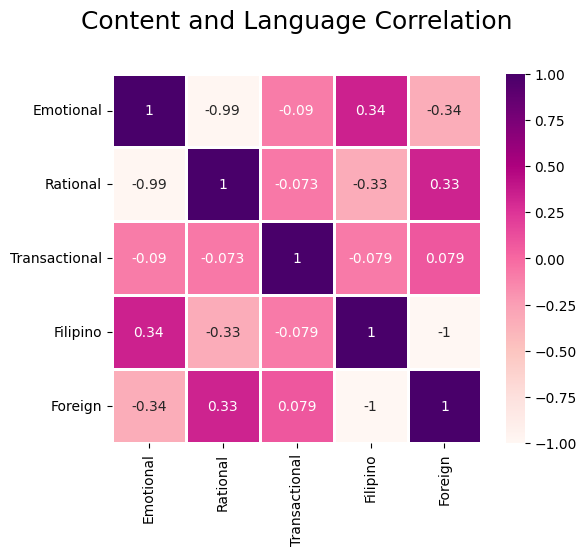

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

heat_map = pd.DataFrame({
    'Emotional' : content_encoded['Content type_Emotional'],
    'Rational' : content_encoded['Content type_Rational'],
    'Transactional' : content_encoded['Content type_Transactional'],
    'Filipino' : language_encoded['Thread/Tweet Language_Filipino'],
    'Foreign' : language_encoded['Thread/Tweet Language_Foreign'],
})

plt.title('Content and Language Correlation', size=18, y=1.1)
sns.heatmap(heat_map.astype(float).corr(),
            cmap=plt.cm.RdPu, linecolor='white', annot=True,
            linewidths=1, vmax=1.0, square=True)
plt.show()

In the plot, we can observe the following from our dataset:
- there is a moderate positive correlation between Emotional tweets and Filipino tweets, with a value of 0.34
- there is a moderate positive correlation between Rational tweets and Foreign tweets, with a value of 0.33
- there is a moderate negative correlation between Emotional tweets and Foreign tweets, with a value of -0.34
- there is a moderate negative correlation between Rational tweets and Filipino tweets, with a value of -0.33
- the Transactional tweets have weak linear relationships among all other categories